In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv('/home/aditya/Desktop/Prodigy/Task 2/Mall_Customers.csv')

In [6]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns


In [7]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [8]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))


In [9]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimal number of clusters using Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

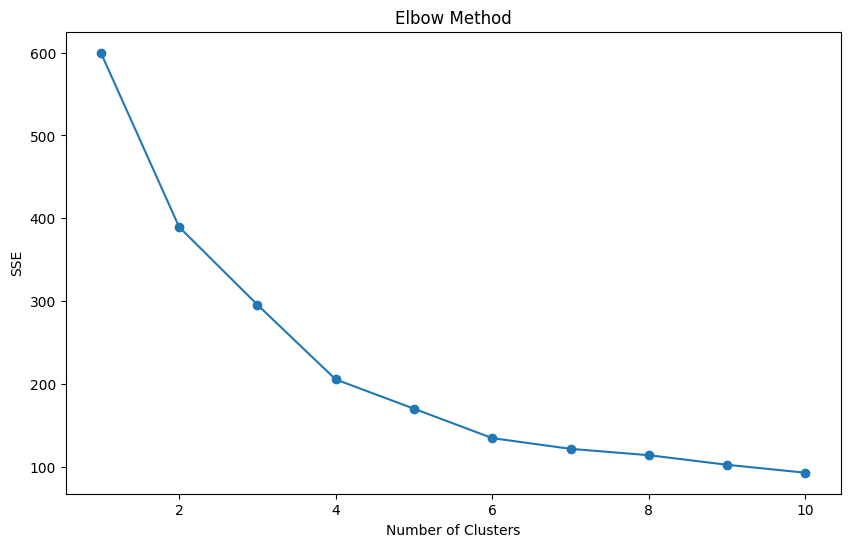

In [10]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [11]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


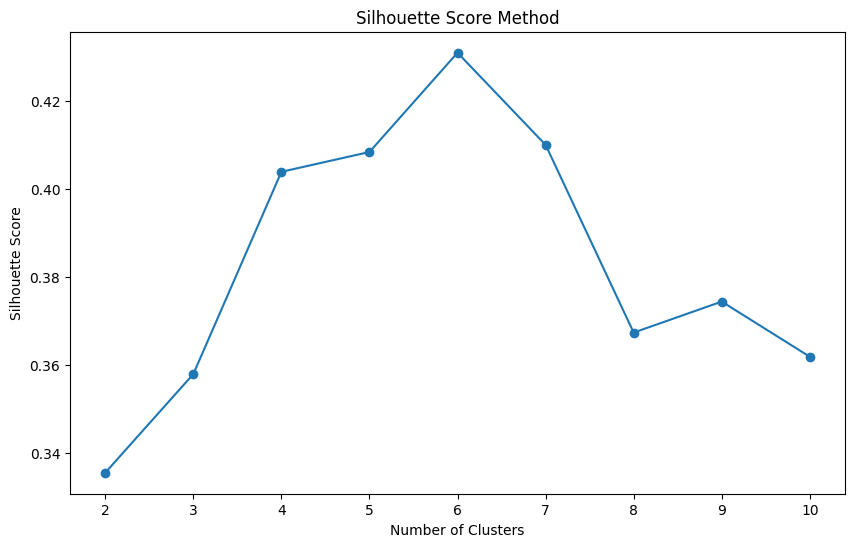

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [13]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


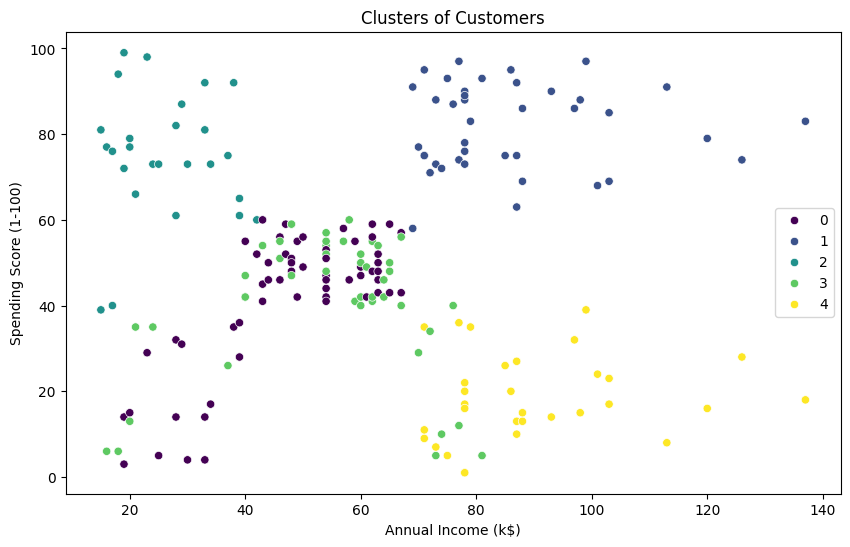

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [15]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(optimal_k)


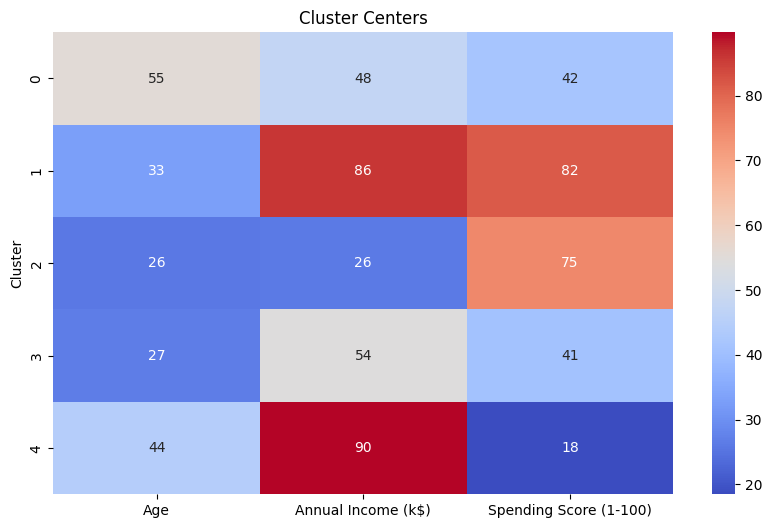

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers')
plt.show()

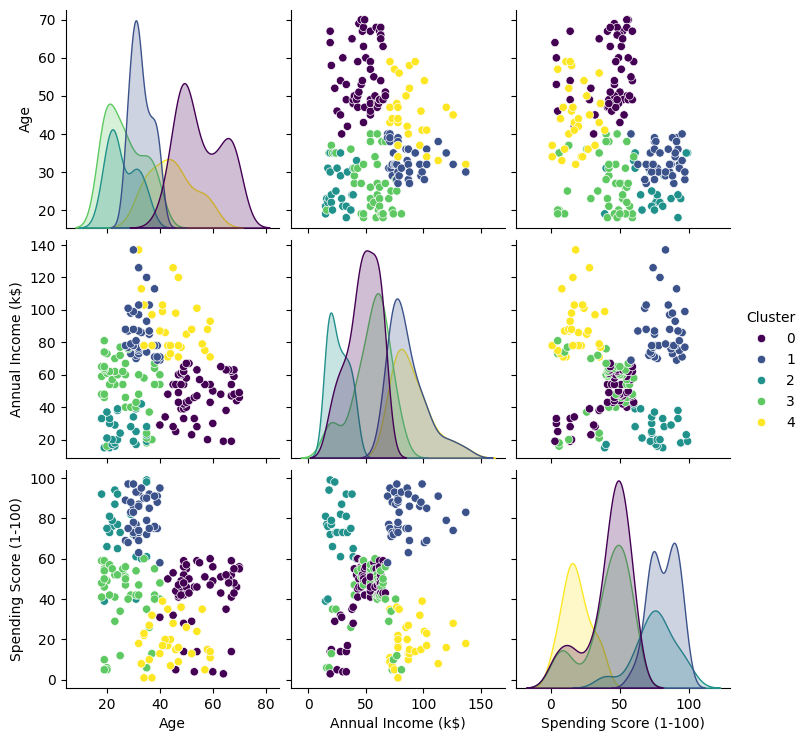

In [17]:
sns.pairplot(data, hue='Cluster', palette='viridis', vars=features)
plt.show()


/tmp/ipykernel_7090/4192266164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
/tmp/ipykernel_7090/4192266164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
/tmp/ipykernel_7090/4192266164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')


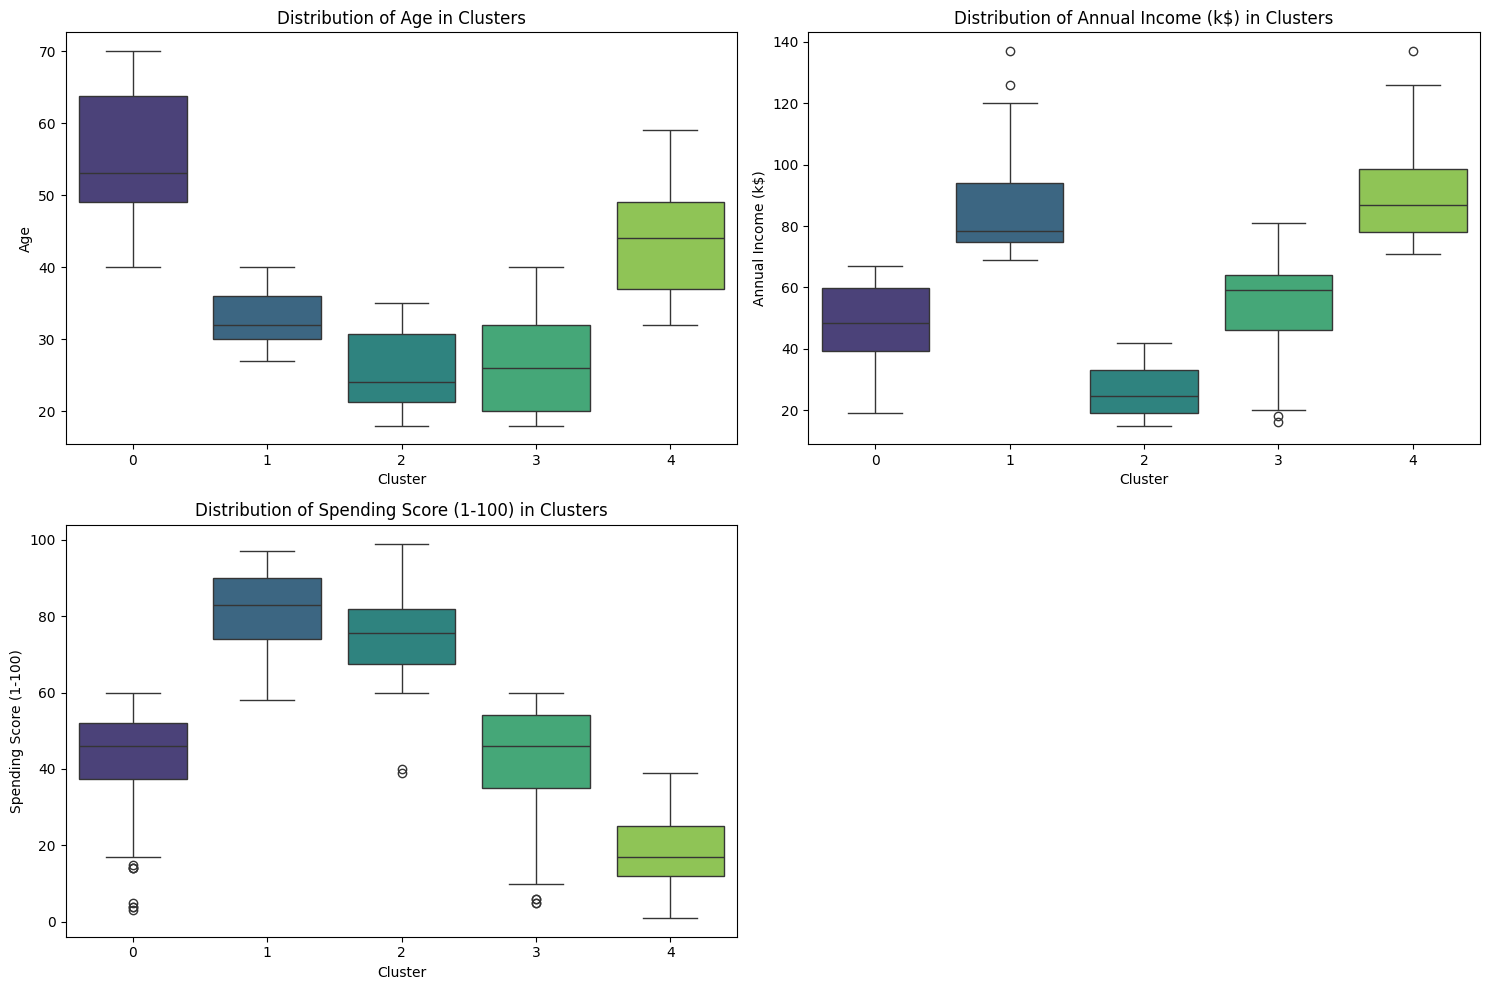

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} in Clusters')
plt.tight_layout()
plt.show()

In [19]:
cluster_summary = data.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)

# Save the clustered data
data.to_csv('clustered_customers.csv', index=False)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  55.275862           47.620690               41.706897
1        1  32.875000           86.100000               81.525000
2        2  25.769231           26.115385               74.846154
3        3  26.733333           54.311111               40.911111
4        4  44.387097           89.774194               18.483871
